In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from saveload import saveload as sl
# from os import path
# from os import listdir
# from os.path import isfile, join
import os
import re
import glob

In [35]:
os.name

'nt'

In [88]:
# get current directory 
path = os.getcwd() 
print("Current Directory", path) 
print(path)

Current Directory C:\Users\hlb749\OneDrive - University of Saskatchewan\WhiteGull\MESH_Whitegull\Model\Config_PointScale\Test_Jan-22-2020_0953
C:\Users\hlb749\OneDrive - University of Saskatchewan\WhiteGull\MESH_Whitegull\Model\Config_PointScale\Test_Jan-22-2020_0953


In [37]:
# Obtain the trial name from the directory name

start = path.rfind('\\')+1 if path.rfind('\\') > 0 else path.rfind('/')+1
# try:
#     start = path.rfind('\\')+1
#     print('Try returned successful')
# except:
#     start = path.rfind('/')+1
#     print('Try returned unsuccessful and exception triggered')

print(start)    
# rfind searches a string starting from the end
# used try/except to be compatible when running both from windows and the command line
end = -17
trial = path[start:end]
print('Trial='+trial)

103
Trial=Test


# Load the Water Balance file
and format the dataframe

In [38]:
# fname = "BASINAVG1"
# trial = 'Test'
# fRead = "../Model/Config_PointScale/"+fname+"/Basin_average_water_balance.csv"
WB = pd.read_csv("Basin_average_water_balance.csv", skipinitialspace=True)
WB = WB.drop(columns="Unnamed: 36")
WB

,YEAR,DAY,PREACC,EVAPACC,ROFACC,ROFOACC,ROFSACC,ROFBACC,DSTGACC,PRE,...,LQWS3,FRWS3,ALWS3,LQWS,FRWS,ALWS,LZS,DZS,STG,DSTG
0,1998,274,0.000000,1.450513,367.0863,0.000,0.0,367.0863,-453.6600,0.000000,...,1188.3640,0.0,1188.3640,1260.8730,0.017237,1260.8900,0.0,0.0,1260.8900,-453.660000
1,1998,275,0.000000,2.821240,425.3565,0.000,0.0,425.3565,-515.3942,0.000000,...,1065.2610,0.0,1065.2610,1137.4220,0.000000,1137.4220,0.0,0.0,1137.4220,-123.468000
2,1998,276,3.041093,5.042028,457.5776,0.000,0.0,457.5776,-550.0242,3.041093,...,1020.9440,0.0,1020.9440,1095.1590,0.000000,1095.1590,0.0,0.0,1095.2650,-42.157100
3,1998,277,5.999998,5.656953,479.8067,0.000,0.0,479.8067,-573.7086,2.958905,...,993.5878,0.0,993.5878,1069.4030,0.000000,1069.4030,0.0,0.0,1069.7860,-25.478760
4,1998,278,5.999998,6.024255,496.8625,0.000,0.0,496.8625,-591.6093,0.000000,...,974.3380,0.0,974.3380,1050.9100,0.000000,1050.9100,0.0,0.0,1051.3390,-18.447630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2008,270,4843.097000,3969.231000,2034.9760,1258.826,0.0,776.4474,-1209.4700,0.000000,...,280.4375,0.0,280.4375,379.6695,0.000000,379.6695,0.0,0.0,379.6696,-0.833038
3649,2008,271,4845.097000,3970.252000,2034.9760,1258.826,0.0,776.4474,-1209.5050,2.000000,...,284.5935,0.0,284.5935,379.2675,0.000000,379.2675,0.0,0.0,379.3086,-0.360992
3650,2008,272,4845.097000,3970.513000,2034.9760,1258.826,0.0,776.4474,-1209.5400,0.000000,...,287.9668,0.0,287.9668,379.4905,0.000000,379.4905,0.0,0.0,379.4906,0.182037
3651,2008,273,4845.097000,3971.632000,2034.9760,1258.826,0.0,776.4474,-1209.5750,0.000000,...,290.5128,0.0,290.5128,378.8650,0.000000,378.8650,0.0,0.0,378.8651,-0.625488


In [39]:
startYear = WB['YEAR'][1]
print("Start year: %d" %startYear)
endYear = WB['YEAR'][len(WB.index)-1]
print("End year: %d" %endYear)

Start year: 1998
End year: 2008


In [40]:
Dates = pd.to_datetime(WB['YEAR'] * 1000 + WB['DAY'], format='%Y%j')
Dates[0]
Dates

0      1998-10-01
1      1998-10-02
2      1998-10-03
3      1998-10-04
4      1998-10-05
          ...    
3648   2008-09-26
3649   2008-09-27
3650   2008-09-28
3651   2008-09-29
3652   2008-09-30
Length: 3653, dtype: datetime64[ns]

In [41]:
WB.columns

Index(['YEAR', 'DAY', 'PREACC', 'EVAPACC', 'ROFACC', 'ROFOACC', 'ROFSACC',
       'ROFBACC', 'DSTGACC', 'PRE', 'EVAP', 'ROF', 'ROFO', 'ROFS', 'ROFB',
       'SNCAN', 'RCAN', 'SNO', 'WSNO', 'PNDW', 'LQWS1', 'FRWS1', 'ALWS1',
       'LQWS2', 'FRWS2', 'ALWS2', 'LQWS3', 'FRWS3', 'ALWS3', 'LQWS', 'FRWS',
       'ALWS', 'LZS', 'DZS', 'STG', 'DSTG'],
      dtype='object')

# Create a water balance plot

In [42]:
# Prep the dataframe

index = pd.date_range(Dates[0], periods = len(WB), freq="D")
index

WB2 = WB[['PRE', 'EVAP', 'ROF', 'ROFO', 'ROFS', 'ROFB']]
WB2.index = index

WB2 = WB2.resample('Y').sum()
WB2['dS'] = WB2['PRE'] - WB2['EVAP'] - WB2['ROF']
WB2
WB2['negdS'] = np.where(WB2['dS'] < 0, WB2['dS']*-1, 0)
WB2['posdS'] = np.where(WB2['dS'] > 0, WB2['dS'], 0)
WB2


,PRE,EVAP,ROF,ROFO,ROFS,ROFB,dS,negdS,posdS
1998-12-31,80.099973,34.902729,697.682006,2.790903,0.0,694.891101,-652.484762,652.484762,0.000000
1999-12-31,488.131293,444.982518,147.379133,87.785708,0.0,59.593428,-104.230358,104.230358,0.000000
2000-12-31,412.053420,415.352202,61.206925,42.742832,0.0,18.464094,-64.505707,64.505707,0.000000
2001-12-31,445.251385,488.164532,58.040511,54.764533,0.0,3.275977,-100.953658,100.953658,0.000000
2002-12-31,290.145010,378.209005,85.379730,85.264508,0.0,0.115222,-173.443725,173.443725,0.000000
2003-12-31,667.354118,474.519207,116.338315,116.338315,0.0,0.000000,76.496595,0.000000,76.496595
2004-12-31,598.015505,410.907204,196.720129,196.720129,0.0,0.000000,-9.611828,9.611828,0.000000
2005-12-31,596.339409,380.552373,297.951383,297.951383,0.0,0.000000,-82.164347,82.164347,0.000000
2006-12-31,443.182460,361.266600,119.556542,119.556542,0.0,0.000000,-37.640682,37.640682,0.000000
2007-12-31,447.136721,275.140423,155.150981,155.150981,0.0,0.000000,16.845317,0.000000,16.845317


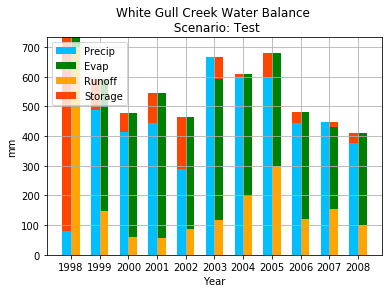

In [43]:
# Make the plot

w = 0.3
a = 'edge'
x = WB2.index.year
 
plt.bar(x, WB2['negdS'], align=a, width=-w, color='orangered', bottom=WB2['PRE'])
plt.bar(x, WB2['PRE'], align=a, width=-w, label='Precip', color='deepskyblue')
plt.bar(x, WB2['EVAP'], align=a, width=w, label='Evap', bottom=WB2['ROF'], color='g')
plt.bar(x, WB2['ROF'], align=a, width=w, label='Runoff', color='orange')
plt.bar(x, WB2['posdS'], align=a, width=w, color='orangered', label='Storage', bottom=WB2['EVAP']+WB2['ROF'])
plt.legend(loc='upper left')
plt.grid()
plt.xticks(x)
plt.xlabel('Year')
plt.ylabel('mm')
plt.title('White Gull Creek Water Balance \n Scenario: '+ trial)
# plt.ylim(0, 500)
# plt.figure(num=None, figsize=(16, 12), dpi=80)

# Save the plot to a file
plt.savefig(trial+'.png', dpi=200)
plt.show()

# Create a water balance table

In [44]:
# Create a table of totals for each variable (precip, evaporation, runoff (overland, interflow, and baseflow), 
# and change in storage)
P_tot = WB['PREACC'][WB.index[-1]]
E_tot = WB['EVAPACC'][WB.index[-1]]
RO_tot = WB['ROFACC'][WB.index[-1]]
RO_tot_Overland = WB['ROFOACC'][WB.index[-1]]
RO_tot_Interflow = WB['ROFSACC'][WB.index[-1]]
RO_tot_Baseflow = WB['ROFBACC'][WB.index[-1]]
E_tot = WB['EVAPACC'][WB.index[-1]]
dS = P_tot - E_tot - RO_tot
dS

data = [['Total Precip', P_tot], ['Total Evap', E_tot], ['Total Runoff', RO_tot], ['Total Overland', RO_tot_Overland], 
        ['Total Interflow', RO_tot_Interflow], ['Total Baseflow ', RO_tot_Baseflow], ['Delta Storage', dS]]
Summary = pd.DataFrame(data, columns = ['Variable', 'Value'])
Summary.index = Summary.Variable
del Summary['Variable']
Summary


,Value
Variable,
Total Precip,4845.0970
Total Evap,3973.2170
Total Runoff,2034.9760
Total Overland,1258.8260
Total Interflow,0.0000
Total Baseflow,776.4474
Delta Storage,-1163.0960


In [45]:
# Save the totals table to a html file
# *** NOT COMPLETE ***

from pandas.plotting import table
# ax = plt.subplot(111, frame_on=False)
# table(Summary, cellText=Summary.Value, rowLabels=Summary.index, colLables=Summary.columns)
# table(ax, Summary)
# table()

# Summary.to_png(Trial+'.png')

# Compare outputs with observed data

## Load paths of observation data

In [46]:
# List the files in the directory

if os.name == 'nt':
    mypath = "C:\\Users\\hlb749\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation" 
    pathlistWC = glob.glob(mypath + "\\*SoilVWC*.csv") # for volumetric water content observations
    pathlistT = glob.glob(mypath + "\\*SoilTemp*.csv") # for soil temperature observations
    pathlistQH = glob.glob(mypath + "\\*Sensible*.csv") # for sensible heat observations
    pathlistQL = glob.glob(mypath + "\\*Latent*.csv") # for latent heat observations
    
else:
#     mypath = '/mnt/c/Users/hlb749/OneDrive - University of Saskatchewan/WhiteGull/MESH_Whitegull/Data/Raw/Validation'
    mypath = "../../../Data/Raw/Validation"
#     mypath = '/home/haleybrauner/OneDrive/WhiteGull/MESH_Whitegull/Data/Raw/Validation/'
#     pathlistWC = glob.glob(os.path.join(mypath, "/BER_OBS_07_SoilVWC*.csv")) # for volumetric water content observations
#     pathlistT = glob.glob(os.path.join(mypath, "/BER_OBS_07_SoilTemp*.csv")) # for soil temperature observations
    pathlistWC = glob.glob(mypath + "BER_OBS_07_SoilVWC*.csv") # for volumetric water content observations
    pathlistT = glob.glob(mypath + "BER_OBS_07_SoilTemp*.csv") # for soil temperature observations
    pathlistQH = glob.glob(mypath + "\\*Sensible*.csv") # for sensible heat observations
    pathlistQL = glob.glob(mypath + "\\*Latent*.csv") # for latent heat observations

print(mypath)
# print(glob.glob(os.path.join(mypath, 'BER_OBS_07_SoilVWC*.csv')))
print(pathlistWC)
print(pathlistT) 
print(pathlistQH)
print(pathlistQL)

# Obtained the import code (the "glob.glob" part from this site (not first answer): 
# https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory/3207254

C:\Users\hlb749\OneDrive - University of Saskatchewan\WhiteGull\MESH_Whitegull\Data\Raw\Validation
['C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_02.5cmNE_11.DailyMean.CSV', 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_02.5cmNW_11.DailyMean.CSV', 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_07.5cmNE_11.DailyMean.CSV', 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_07.5cmNW_11.DailyMean.CSV', 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_22.5cmNE_11.DailyMean.CSV', 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_

In [47]:
pathlistWC

['C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_02.5cmNE_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_02.5cmNW_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_07.5cmNE_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_07.5cmNW_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_22.5cmNE_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan\\WhiteGull\\MESH_Whitegull\\Data\\Raw\\Validation\\BER_OBS_07_SoilVWC_22.5cmNW_11.DailyMean.CSV',
 'C:\\Users\\hlb749\\OneDrive - University of Saskatchewan

## Process Soil VWC Data

In [48]:
# Create an inital dataframe for vwc

# Obtain the observation name from the file name
num=1

name = pathlistWC[num]
start = name.find('Soil')
end = name.find('11')-1
name = name[start:end]
name

'SoilVWC_02.5cmNW'

In [49]:
# Load the data frame and rename columns according to file name
vwc = pd.read_csv(pathlistWC[num], usecols=['Date', 'Value [Cubic meter per cubic meter]'], na_values=["---"])
# vwc1.columns.values[0]="Date_"+name
vwc.columns.values[1]=name
vwc.index = vwc["Date"]
vwc = vwc.drop(columns=["Date",name])
vwc

""
Date
1997-10-01
1997-10-02
1997-10-03
1997-10-04
1997-10-05
...
2019-12-27
2019-12-28
2019-12-29


In [50]:
# Put all the observed VWC data in one dataframe
import re

for f in pathlistWC:
    name = f
    start = name.find('Soil')
    end = name.find('11')-1
    name = name[start:end]
    vwcX = pd.read_csv(f, usecols=['Date', 'Value [Cubic meter per cubic meter]'], na_values=["---"])
    vwcX.columns.values[1]=name
    vwcX.index = vwcX["Date"]
    vwcX = vwcX.drop(columns="Date")
    vwc = pd.concat([vwc,vwcX.iloc[:,0]], axis=1)
    
vwc['Date'] = vwc.index
vwc.index = pd.to_datetime(vwc.index)
vwc
   

,SoilVWC_02.5cmNE,SoilVWC_02.5cmNW,SoilVWC_07.5cmNE,SoilVWC_07.5cmNW,SoilVWC_22.5cmNE,SoilVWC_22.5cmNW,SoilVWC_60to90cmNE,SoilVWC_60to90cmNW,Date
Date,,,,,,,,,
1997-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-01
1997-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-02
1997-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-03
1997-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-04
1997-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-05
...,...,...,...,...,...,...,...,...,...
2019-12-27,0.145948,0.028168,0.098116,0.025158,0.135809,0.180573,0.685408,0.239947,2019-12-27
2019-12-28,0.145378,0.028029,0.094234,0.024726,0.131020,0.178727,0.685463,0.240244,2019-12-28
2019-12-29,0.145319,0.027964,0.091828,0.024542,0.125688,0.176326,0.684489,0.240295,2019-12-29


In [51]:
# Calculate the average of the 2.5cm and 7.5cm measurements to use as the vwc for the first layer @ 5cm depth

vwc["SoilVWC_05.0cmNE"] = vwc[["SoilVWC_02.5cmNE","SoilVWC_07.5cmNE"]].mean(axis=1)
vwc["SoilVWC_05.0cmNW"] = vwc[["SoilVWC_02.5cmNW","SoilVWC_07.5cmNW"]].mean(axis=1)
vwc

# df['avg'] = df[['Monday', 'Tuesday']].mean(axis=1)

,SoilVWC_02.5cmNE,SoilVWC_02.5cmNW,SoilVWC_07.5cmNE,SoilVWC_07.5cmNW,SoilVWC_22.5cmNE,SoilVWC_22.5cmNW,SoilVWC_60to90cmNE,SoilVWC_60to90cmNW,Date,SoilVWC_05.0cmNE,SoilVWC_05.0cmNW
Date,,,,,,,,,,,
1997-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-01,NaN,NaN
1997-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-02,NaN,NaN
1997-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-03,NaN,NaN
1997-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-04,NaN,NaN
1997-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.145948,0.028168,0.098116,0.025158,0.135809,0.180573,0.685408,0.239947,2019-12-27,0.122032,0.026663
2019-12-28,0.145378,0.028029,0.094234,0.024726,0.131020,0.178727,0.685463,0.240244,2019-12-28,0.119806,0.026377
2019-12-29,0.145319,0.027964,0.091828,0.024542,0.125688,0.176326,0.684489,0.240295,2019-12-29,0.118573,0.026253


## Unit conversion for modelled Soil VWC

In [52]:
# Create a new dataframe of just the LQWS values
LQWS = WB[["LQWS1", "LQWS2", "LQWS3"]]
# Units are in kg/m2
LQWS.index = index
LQWS.loc[:,"VWC_S1"] = LQWS["LQWS1"]/1000/0.1
LQWS.loc[:,"VWC_S2"] = LQWS["LQWS2"]/1000/0.25
LQWS.loc[:,"VWC_S3"] = LQWS["LQWS3"]/1000/3.75
LQWS.loc[:,'Date'] = LQWS.index
LQWS

,LQWS1,LQWS2,LQWS3,VWC_S1,VWC_S2,VWC_S3,Date
1998-10-01,14.22434,58.28519,1188.3640,0.142243,0.233141,0.316897,1998-10-01
1998-10-02,17.89741,54.26337,1065.2610,0.178974,0.217053,0.284070,1998-10-02
1998-10-03,20.40534,53.80910,1020.9440,0.204053,0.215236,0.272252,1998-10-03
1998-10-04,21.33253,54.48253,993.5878,0.213325,0.217930,0.264957,1998-10-04
1998-10-05,21.46590,55.10591,974.3380,0.214659,0.220424,0.259823,1998-10-05
...,...,...,...,...,...,...,...
2008-09-26,26.65119,72.58086,280.4375,0.266512,0.290323,0.074783,2008-09-26
2008-09-27,25.64913,69.02483,284.5935,0.256491,0.276099,0.075892,2008-09-27
2008-09-28,24.91580,66.60795,287.9668,0.249158,0.266432,0.076791,2008-09-28
2008-09-29,24.30611,64.04601,290.5128,0.243061,0.256184,0.077470,2008-09-29


## Process Soil T Observations

In [53]:
# Create an inital dataframe for temp

# Obtain the observation name from the file name
num=0

nameT = pathlistT[num]
import re
start = nameT.find('Soil')
end = nameT.find('11')-1
nameT = nameT[start:end]
nameT

'SoilTemp_005cmNE'

In [54]:
# Load the data frame and rename columns according to file name
soilT = pd.read_csv(pathlistT[num], usecols=['Date', 'Value [degree Celsius]'], na_values=["---"])
soilT.columns.values[1]=nameT
soilT.index = soilT["Date"]
soilT = soilT.drop(columns=["Date",nameT])
soilT

""
Date
1997-10-01
1997-10-02
1997-10-03
1997-10-04
1997-10-05
...
2019-12-27
2019-12-28
2019-12-29


In [55]:
# Put all the observed Soil Temp data in one dataframe

for f in pathlistT:
    nameT = f
    start = nameT.find('Soil')
    end = nameT.find('11')-1
    nameT = nameT[start:end]
    soilTX = pd.read_csv(f, usecols=['Date', 'Value [degree Celsius]'], na_values=["---"])
    soilTX.columns.values[1]=nameT
    soilTX.index = soilTX["Date"]
    soilTX = soilTX.drop(columns="Date")
    soilT = pd.concat([soilT,soilTX.iloc[:,0]], axis=1)
    
soilT['Date'] = soilT.index
soilT.index = pd.to_datetime(soilT.index)
soilT

,SoilTemp_005cmNE,SoilTemp_005cmNW,SoilTemp_020cmNE,SoilTemp_020cmNW,SoilTemp_100cmNE,SoilTemp_100cmNW,Date
Date,,,,,,,
1997-10-01,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-01
1997-10-02,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-02
1997-10-03,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-03
1997-10-04,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-04
1997-10-05,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-05
...,...,...,...,...,...,...,...
2019-12-27,-0.733545,-1.943040,0.003022,0.319977,1.243727,NaN,2019-12-27
2019-12-28,-0.798579,-2.176121,-0.011731,0.305939,1.216367,NaN,2019-12-28
2019-12-29,-0.831033,-2.293746,-0.020851,0.288160,1.189121,NaN,2019-12-29


## Process Latent and Sensible Heat Flux Observations

In [56]:
# Create an inital dataframe for temp

# Obtain the observation name from the file name
num=0

nameQH = pathlistQH[num]
import re
start = nameQH.find('Sensible')
end = nameQH.find('05.')-1
nameQH = nameQH[start:end]
nameQH

nameQL = pathlistQL[num]
import re
start = nameQL.find('Latent')
end = nameQL.find('05.')-1
nameQL = nameQL[start:end]
nameQL

'LatentEddyFlux25m'

In [57]:
# Load the data frame and rename columns according to file name
QH = pd.read_csv(pathlistQH[num], usecols=['Date/Time', 'Value [watt per square meter]'], na_values=["---"])
QH.columns.values[1]=nameQH
QH.index = QH["Date/Time"]
QH = QH.drop(columns=["Date/Time",nameQH])
QH

QL = pd.read_csv(pathlistQL[num], usecols=['Date/Time', 'Value [watt per square meter]'], na_values=["---"])
QL.columns.values[1]=nameQL
QL.index = QL["Date/Time"]
QL = QL.drop(columns=["Date/Time",nameQL])
QL

""
Date/Time
1997-01-01 00:00:00
1997-01-01 00:30:00
1997-01-01 01:00:00
1997-01-01 01:30:00
1997-01-01 02:00:00
...
2019-12-31 21:30:00
2019-12-31 22:00:00
2019-12-31 22:30:00


In [58]:
# Put all the observed Soil Temp data in one dataframe

for f in pathlistQH:
    nameQH = f
    start = nameQH.find('Sensible')
    end = nameQH.find('05.')-1
    nameQH = nameQH[start:end]
    QHX = pd.read_csv(f, usecols=['Date/Time', 'Value [watt per square meter]'], na_values=["---"])
    QHX.columns.values[1]=nameQH
    QHX.index = QHX["Date/Time"]
    QHX = QHX.drop(columns="Date/Time")
    QH = pd.concat([QH,QHX.iloc[:,0]], axis=1)
    
for f in pathlistQL:
    nameQL = f
    start = nameQL.find('Latent')
    end = nameQL.find('05.')-1
    nameQL = nameQL[start:end]
    QLX = pd.read_csv(f, usecols=['Date/Time', 'Value [watt per square meter]'], na_values=["---"])
    QLX.columns.values[1]=nameQL
    QLX.index = QLX["Date/Time"]
    QLX = QLX.drop(columns="Date/Time")
    QL = pd.concat([QL,QLX.iloc[:,0]], axis=1)
    
QH['Date/Time'] = QH.index
QH.index = pd.to_datetime(QH.index)
QH = QH.resample('24H').mean()

QL['Date/Time'] = QL.index
QL.index = pd.to_datetime(QL.index)
QL = QL.resample('24H').mean()
QH

,SensibleEddyFlux25m,SensibleStorageFlux
Date/Time,,
1997-01-01,NaN,2.119551
1997-01-02,NaN,0.150184
1997-01-03,NaN,0.110070
1997-01-04,NaN,-0.385549
1997-01-05,NaN,1.354098
...,...,...
2019-12-27,NaN,NaN
2019-12-28,NaN,NaN
2019-12-29,NaN,NaN


In [59]:
QL

,LatentEddyFlux25m,LatentStorageFlux
Date/Time,,
1997-01-01,NaN,0.362855
1997-01-02,NaN,0.004493
1997-01-03,NaN,0.020769
1997-01-04,NaN,-0.068132
1997-01-05,NaN,0.311871
...,...,...
2019-12-27,NaN,NaN
2019-12-28,NaN,NaN
2019-12-29,NaN,NaN


## Load Energy Balance file

In [60]:
EB = pd.read_csv("Basin_average_energy_balance.csv", skipinitialspace=True)
EB = EB.drop(columns="Unnamed: 19")
EB

,YEAR,DAY,FSIN,FSOUT,ALBT,FLIN,FLOUT,GTE,QH,QE,GZERO,TA,TCAN,CMAS,TSNOW,TPOND,TBAR1,TBAR2,TBAR3
0,1998,274,157.47300,140.47220,0.065437,275.2551,340.8856,5.196899,20.426640,41.987650,12.569370,6.000885,5.742981,12.0,0.0,0.0,2.638855,1.219177,0.292053
1,1998,275,152.69290,136.18760,0.072445,260.1313,341.1199,5.291412,6.598341,39.678100,8.667311,5.404816,5.801270,12.0,0.0,0.0,3.192017,2.453186,0.306702
2,1998,276,94.06191,83.78414,0.062372,301.5302,340.6088,5.217590,-28.658860,64.284620,8.791201,5.572052,5.567810,12.0,0.0,0.0,3.737854,3.062256,0.332031
3,1998,277,28.25882,25.22722,0.073105,339.8014,343.7953,5.908264,-6.656607,17.800070,9.259408,6.151001,6.202393,12.0,0.0,0.0,4.604248,3.811188,0.364136
4,1998,278,31.74395,28.39905,0.060683,338.0064,346.1963,6.386566,4.546155,10.632220,6.656487,7.084106,6.624298,12.0,0.0,0.0,5.286591,4.473389,0.403473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2008,270,172.47670,156.70410,0.056026,270.4292,350.4331,7.153503,18.744300,52.647190,4.871633,7.594727,7.124634,12.0,0.0,0.0,7.101654,6.852631,10.113590
3649,2008,271,40.50330,36.78390,0.055425,320.4979,340.4287,5.204468,-5.166734,29.565010,-8.493082,5.474304,5.077972,12.0,0.0,0.0,5.936890,6.785583,10.074460
3650,2008,272,27.43351,24.83614,0.053824,338.2796,342.9675,5.741882,16.348140,7.549942,-3.830544,5.307922,5.622070,12.0,0.0,0.0,6.269409,6.619324,10.032780
3651,2008,273,120.81700,108.90860,0.060372,319.8038,359.9864,9.044067,17.960010,32.461800,14.940450,9.240234,9.392487,12.0,0.0,0.0,7.468414,6.812042,9.992371


In [61]:
EB.columns

Index(['YEAR', 'DAY', 'FSIN', 'FSOUT', 'ALBT', 'FLIN', 'FLOUT', 'GTE', 'QH',
       'QE', 'GZERO', 'TA', 'TCAN', 'CMAS', 'TSNOW', 'TPOND', 'TBAR1', 'TBAR2',
       'TBAR3'],
      dtype='object')

In [62]:
startYear = WB['YEAR'][1]
startYear
endYear = WB['YEAR'][len(WB.index)-1]
endYear

Dates = pd.to_datetime(WB['YEAR'] * 1000 + WB['DAY'], format='%Y%j')
Dates[0]
Dates

index = pd.date_range(Dates[0], periods = len(EB), freq="D")
index

EB2 = EB[['QH', 'QE', 'TBAR1', 'TBAR2', 'TBAR3']]
# Units: QH and QE are in W/m2, TBAR in C for middle of the soil layer
# Note: the wiki (https://wiki.usask.ca/display/MESH/Variable+List) says that TBAR is in K, but the
# values in this instance are clearly in oC

EB2.index = index
EB2

,QH,QE,TBAR1,TBAR2,TBAR3
1998-10-01,20.426640,41.987650,2.638855,1.219177,0.292053
1998-10-02,6.598341,39.678100,3.192017,2.453186,0.306702
1998-10-03,-28.658860,64.284620,3.737854,3.062256,0.332031
1998-10-04,-6.656607,17.800070,4.604248,3.811188,0.364136
1998-10-05,4.546155,10.632220,5.286591,4.473389,0.403473
...,...,...,...,...,...
2008-09-26,18.744300,52.647190,7.101654,6.852631,10.113590
2008-09-27,-5.166734,29.565010,5.936890,6.785583,10.074460
2008-09-28,16.348140,7.549942,6.269409,6.619324,10.032780
2008-09-29,17.960010,32.461800,7.468414,6.812042,9.992371


In [63]:
EB2[['QH']]

,QH
1998-10-01,20.426640
1998-10-02,6.598341
1998-10-03,-28.658860
1998-10-04,-6.656607
1998-10-05,4.546155
...,...
2008-09-26,18.744300
2008-09-27,-5.166734
2008-09-28,16.348140
2008-09-29,17.960010


# Plotting

<function matplotlib.pyplot.show(*args, **kw)>

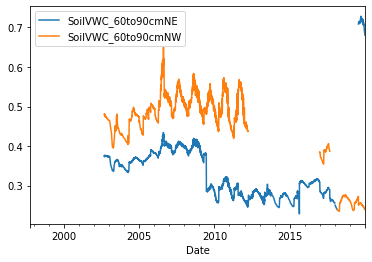

In [64]:
# Initial plots

vwc.plot(kind='line', y=["SoilVWC_60to90cmNE", "SoilVWC_60to90cmNW"])
# LQWS.plot(kind='line', y="VWC_S1")
plt.show

# The method above is using the Pandas plotting function, not the pyplot functions.

## Plot modelled vs observed soil moisture

In [65]:
start = LQWS.index[0].strftime("%Y-%m-%d")
end = LQWS.index[len(LQWS)-1].strftime("%Y-%m-%d")
print(start)
print(end)

1998-10-01
2008-09-30


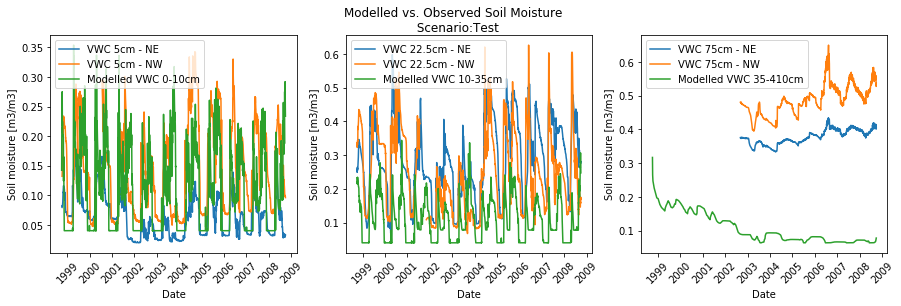

In [66]:
fig = plt.figure(figsize=(15,4), frameon=False)
fig.suptitle("Modelled vs. Observed Soil Moisture \n Scenario:" + trial)

ax1 = fig.add_subplot(1,3,1)
ax1.plot(vwc[['SoilVWC_05.0cmNE']][start:end], label = "VWC 5cm - NE")
ax1.plot(vwc[['SoilVWC_05.0cmNW']][start:end], label = "VWC 5cm - NW")
ax1.plot(LQWS[['VWC_S1']], label = "Modelled VWC 0-10cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil moisture [m3/m3]")
# plt.ylim((0, 0.7)) 
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(vwc[['SoilVWC_22.5cmNE']][start:end], label = "VWC 22.5cm - NE")
ax2.plot(vwc[['SoilVWC_22.5cmNW']][start:end], label = "VWC 22.5cm - NW")
ax2.plot(LQWS[['VWC_S2']], label = "Modelled VWC 10-35cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil moisture [m3/m3]")
# plt.ylim((0, 0.7))
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(vwc[['SoilVWC_60to90cmNE']][start:end], label = "VWC 75cm - NE")
ax3.plot(vwc[['SoilVWC_60to90cmNW']][start:end], label = "VWC 75cm - NW")
ax3.plot(LQWS[['VWC_S3']], label = "Modelled VWC 35-410cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil moisture [m3/m3]")
# plt.ylim((0, 0.7)) 
ax3.legend(loc='upper left')
plt.xlabel("Date")

plt.show()
fig.savefig('SoilMoisture_'+trial+'.png', dpi=200)

# To improve:
# - Share a y-axis
# - Add a title across the whole plot (not just one sub-plot)
# - Avoid repeating the formatting (i.e. ylim, xtick rotation) above


## Plot modelled vs. observed soil temperature

<function matplotlib.pyplot.show(*args, **kw)>

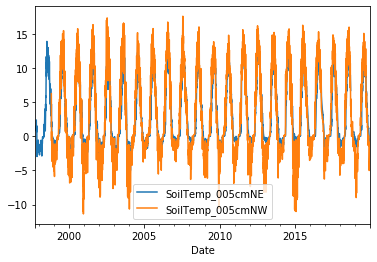

In [67]:
soilT.plot(kind='line', y=["SoilTemp_005cmNE", "SoilTemp_005cmNW"])
# LQWS.plot(kind='line', y="VWC_S1")
plt.show

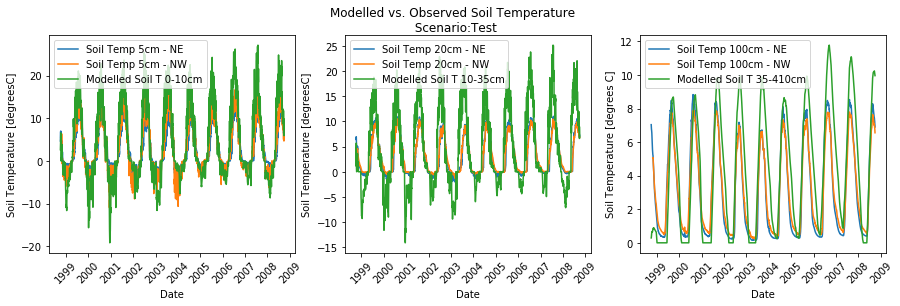

In [68]:
# Use same start and end as above
fig = plt.figure(figsize=(15,4), frameon=False)
fig.suptitle("Modelled vs. Observed Soil Temperature \n Scenario:" + trial)

ax1 = fig.add_subplot(1,3,1)
ax1.plot(soilT[['SoilTemp_005cmNE']][start:end], label = "Soil Temp 5cm - NE")
ax1.plot(soilT[['SoilTemp_005cmNW']][start:end], label = "Soil Temp 5cm - NW")
ax1.plot(EB2[['TBAR1']], label = "Modelled Soil T 0-10cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil Temperature [degreesC]")
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(soilT[['SoilTemp_020cmNE']][start:end], label = "Soil Temp 20cm - NE")
ax2.plot(soilT[['SoilTemp_020cmNW']][start:end], label = "Soil Temp 20cm - NW")
ax2.plot(EB2[['TBAR2']], label = "Modelled Soil T 10-35cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil Temperature [degreesC]")
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(soilT[['SoilTemp_100cmNE']][start:end], label = "Soil Temp 100cm - NE")
ax3.plot(soilT[['SoilTemp_100cmNW']][start:end], label = "Soil Temp 100cm - NW")
ax3.plot(EB2[['TBAR3']], label = "Modelled Soil T 35-410cm")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Soil Temperature [degrees C]")
ax3.legend(loc='upper left')

plt.show()
fig.savefig('SoilTemp_' + trial + '.png', dpi=200)

## Plotting observed vs. modelled sensible and latent heat

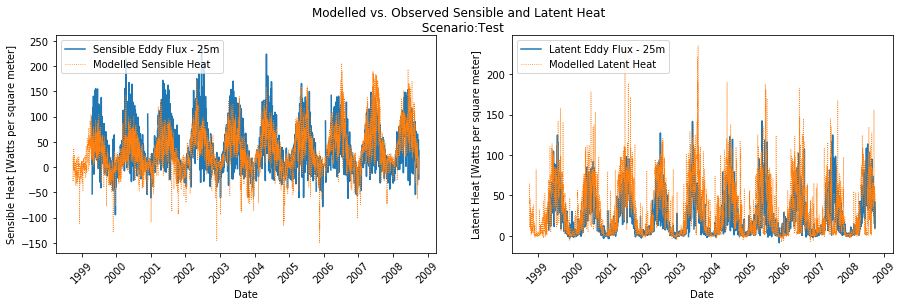

In [87]:
# Use same start and end as above
fig = plt.figure(figsize=(15,4), frameon=False)
fig.suptitle("Modelled vs. Observed Sensible and Latent Heat \n Scenario:" + trial)

ax1 = fig.add_subplot(1,2,1)
ax1.plot(QH[['SensibleEddyFlux25m']][start:end], label = "Sensible Eddy Flux - 25m")
# ax1.plot(QH[['SensibleStorageFlux']][start:end], label = "Sensible Storage Flux")
ax1.plot(EB2[['QH']], label = "Modelled Sensible Heat", linewidth = 0.8, linestyle = ':')
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Sensible Heat [Watts per square meter]")
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(QL[['LatentEddyFlux25m']][start:end], label = "Latent Eddy Flux - 25m")
# ax2.plot(QL[['LatentStorageFlux']][start:end], label = "Latent Storage Flux")
ax2.plot(EB2[['QE']], label = "Modelled Latent Heat", linewidth = 0.8, linestyle = ':')
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Latent Heat [Watts per square meter]")
ax2.legend(loc='upper left')

plt.show()
fig.savefig('Sensible_Latent_' + trial + '.png', dpi=200)